# MLP on MNIST dataset using Keras

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print('Number of trianing examples:',x_train.shape[0],'and Images of dimension:',x_train.shape[1:])
print('Number of test examples:',x_test.shape[0],'and Images of dimension:',x_test.shape[1:])

Number of trianing examples: 60000 and Images of dimension: (28, 28)
Number of test examples: 10000 and Images of dimension: (28, 28)


### Converting data to desired form

In [6]:
#images should be flattened to 1-dim, from 28X28 to 784
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print('Number of trianing examples:',x_train.shape[0],'and Images of dimension:',x_train.shape[1:])
print('Number of test examples:',x_test.shape[0],'and Images of dimension:',x_test.shape[1:])

Number of trianing examples: 60000 and Images of dimension: (784,)
Number of test examples: 10000 and Images of dimension: (784,)


In [7]:
x_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
#normalizing the data 
x_train=x_train/255
x_test=x_test/255
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
#output is number with 10 types 0-9
print('image classified as ',y_train[1])
#we need to one-Hot encode the output as it is needed for MLPs
y_train= np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)
print('after conversion image classified as ',y_train[1])

image classified as  0
after conversion image classified as  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## MODEL1-  with 2-Hidden layers  input(784)--hidden(400)--hidden(100)--Output(10)

In [10]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout
from keras import initializers

### Simple 2 hidden layer design model

In [11]:
#model declaration and initialization
model_1A= Sequential()
model_1A.add(Dense(400, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1A.add(Dense(100, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_1A.add(Dense(10, activation='softmax'))

print(model_1A.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#run
model_1A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1A = model_1A.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2968 - acc: 0.9153 - val_loss: 0.1412 - val_acc: 0.9565 loss: 0.
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1062 - acc: 0.9685 - val_loss: 0.1024 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0690 - acc: 0.9792 - val_loss: 0.0801 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0503 - acc: 0.9849 - val_loss: 0.0682 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0346 - acc: 0.9899 - val_loss: 0.0710 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0261 - acc: 0.9924 - val_loss: 0.0762 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step

In [13]:
score= model_1A.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.09683440083766617
Test accuracy:  0.9784


<IPython.core.display.Javascript object>


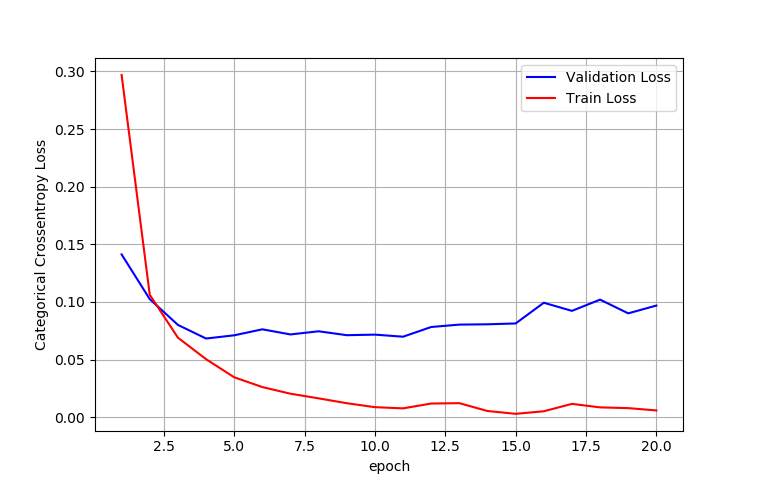

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_1A.history['val_loss']
ty = history_1A.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


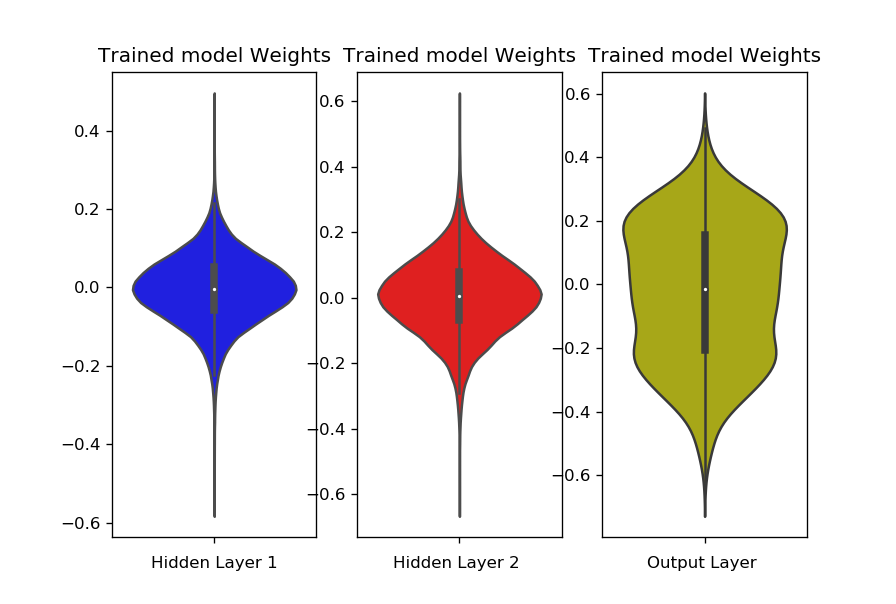

In [17]:
w_after = model_1A.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2 hidden layer with batch normalization

In [18]:
#model declaration and initialization
from keras.layers.normalization import BatchNormalization
model_1B= Sequential()
model_1B.add(Dense(400, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1B.add(BatchNormalization())

model_1B.add(Dense(100, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_1B.add(BatchNormalization())

model_1B.add(Dense(10, activation='softmax', \
                   kernel_initializer=keras.initializers.he_normal(seed=None)))

print(model_1B.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               40100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 357,110
Trainable params: 356,110
Non-trainable params: 1,000
_________________________________________________________________
None


In [19]:
#run
model_1B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1B = model_1B.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.2218 - acc: 0.9355 - val_loss: 0.1130 - val_acc: 0.9648
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0775 - acc: 0.9774 - val_loss: 0.0877 - val_acc: 0.9736
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0456 - acc: 0.9863 - val_loss: 0.0816 - val_acc: 0.9751
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0302 - acc: 0.9907 - val_loss: 0.0735 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0225 - acc: 0.9934 - val_loss: 0.0686 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 7s 108us/step - loss: 0.0169 - acc: 0.9954 - val_loss: 0.0675 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0775 - 

In [20]:
score= model_1B.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.07795610921084517
Test accuracy:  0.9806


<IPython.core.display.Javascript object>


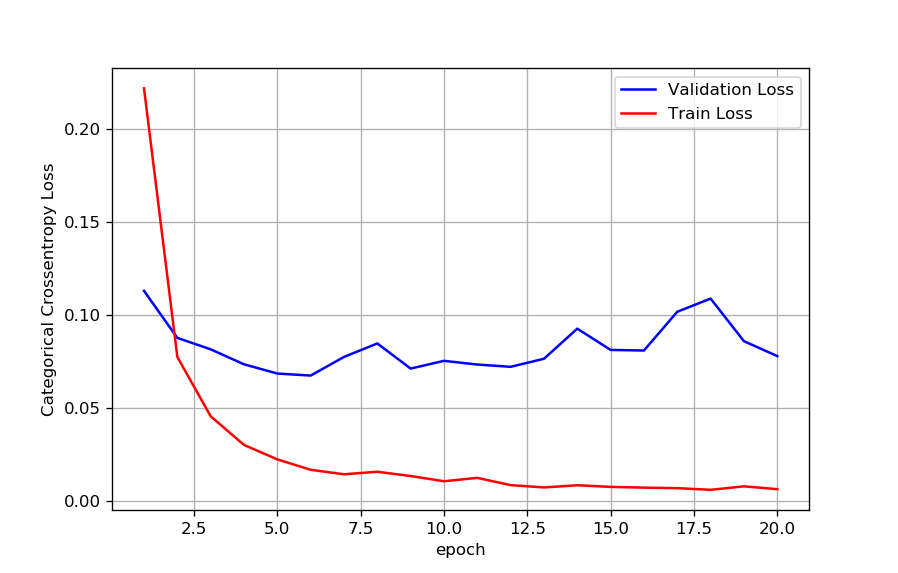

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_1B.history['val_loss']
ty = history_1B.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


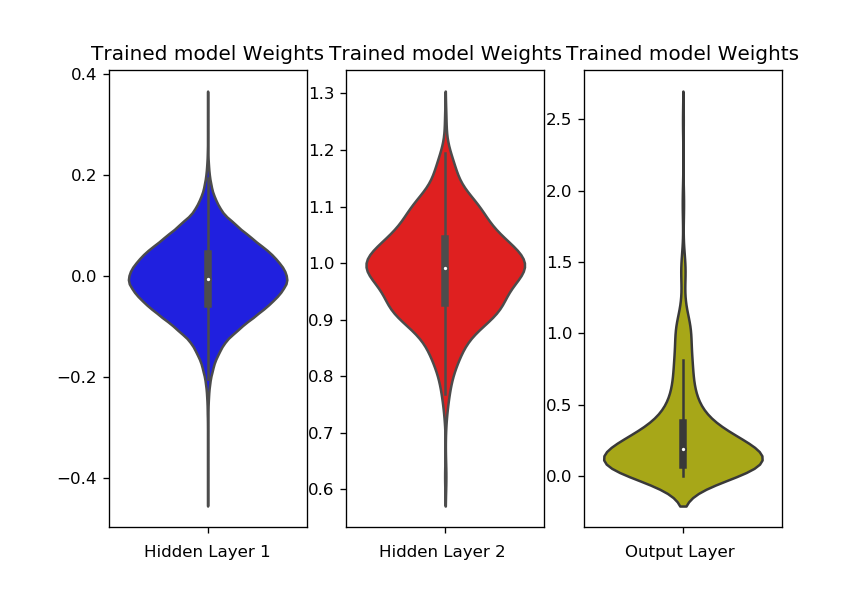

In [22]:
w_after = model_1B.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2 hidden layer with dropouts

In [23]:
#model declaration and initialization
model_1C= Sequential()

model_1C.add(Dense(400, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1C.add(Dropout(0.25))

model_1C.add(Dense(100, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_1C.add(Dropout(0.25))

model_1C.add(Dense(10, activation='softmax'))

print(model_1C.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3900 - acc: 0.8815 - val_loss: 0.1394 - val_acc: 0.9575
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1554 - acc: 0.9531 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1119 - acc: 0.9662 - val_loss: 0.0815 - val_acc: 0.9733
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0879 - acc: 0.9723 - val_loss: 0.0743 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0721 - acc: 0.9768 - val_loss: 0.0675 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0620 - acc: 0.9804 - val_loss: 0.0661 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0643 - 

<IPython.core.display.Javascript object>


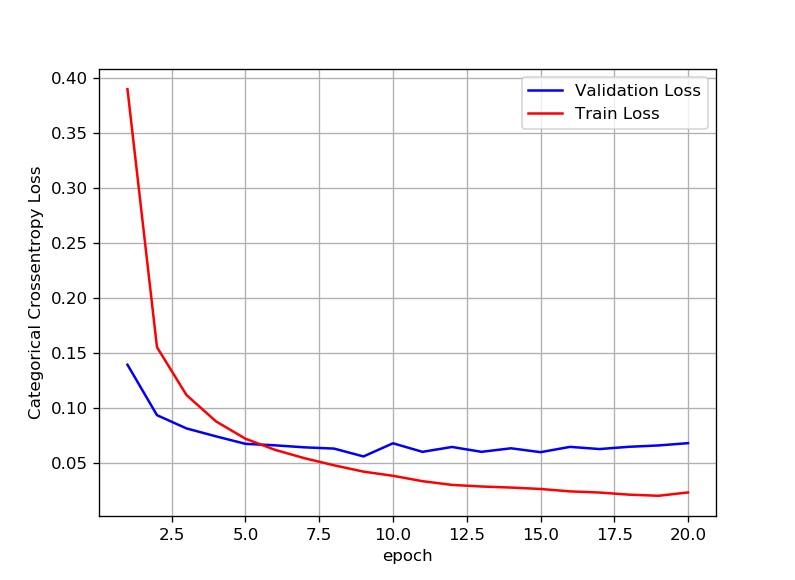

------------------------------------------------------------


<IPython.core.display.Javascript object>


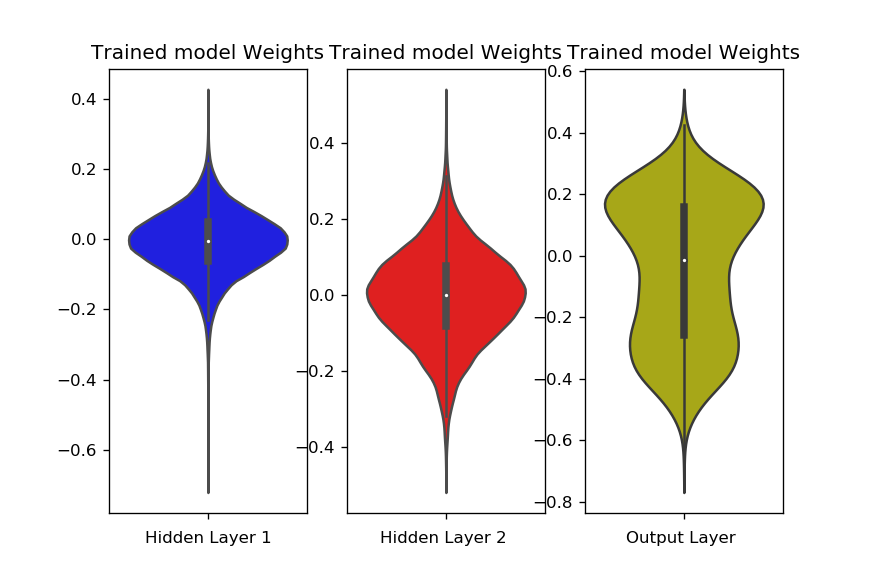

In [24]:
#run
model_1C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1C = model_1C.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_1C.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_1C.history['val_loss']
ty = history_1C.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_1C.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2 hidden layer with dropouts and batch normalization

In [25]:
#model declaration and initialization
model_1D= Sequential()
model_1D.add(Dense(400, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1D.add(BatchNormalization())
model_1D.add(Dropout(0.25))

model_1D.add(Dense(100, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_1D.add(BatchNormalization())
model_1D.add(Dropout(0.25))

model_1D.add(Dense(10, activation='softmax'))

print(model_1D.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               40100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total para

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.3211 - acc: 0.9030 - val_loss: 0.1282 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1379 - acc: 0.9589 - val_loss: 0.0905 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1007 - acc: 0.9687 - val_loss: 0.0811 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0788 - acc: 0.9754 - val_loss: 0.0779 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0669 - acc: 0.9786 - val_loss: 0.0741 - val_acc: 0.9763- loss: 0.0665 - acc
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0619 - acc: 0.9799 - val_loss: 0.0631 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0518 - acc: 0.9831 -

<IPython.core.display.Javascript object>


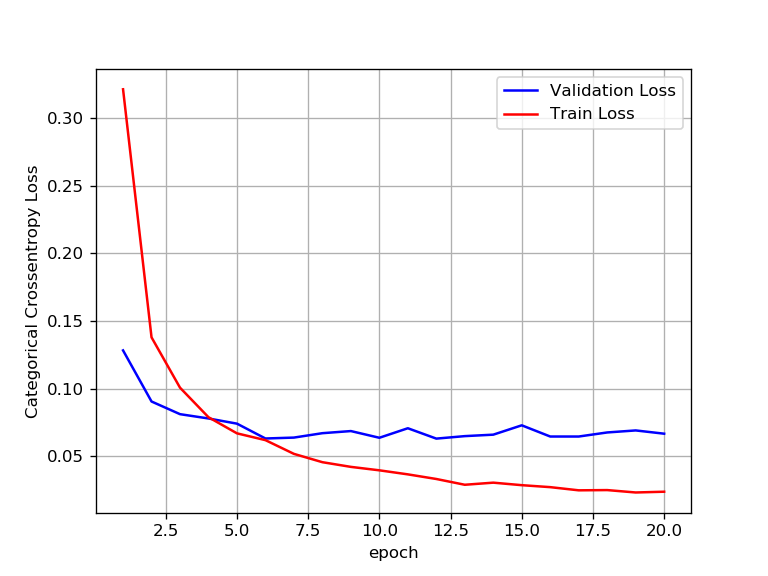

------------------------------------------------------------


<IPython.core.display.Javascript object>


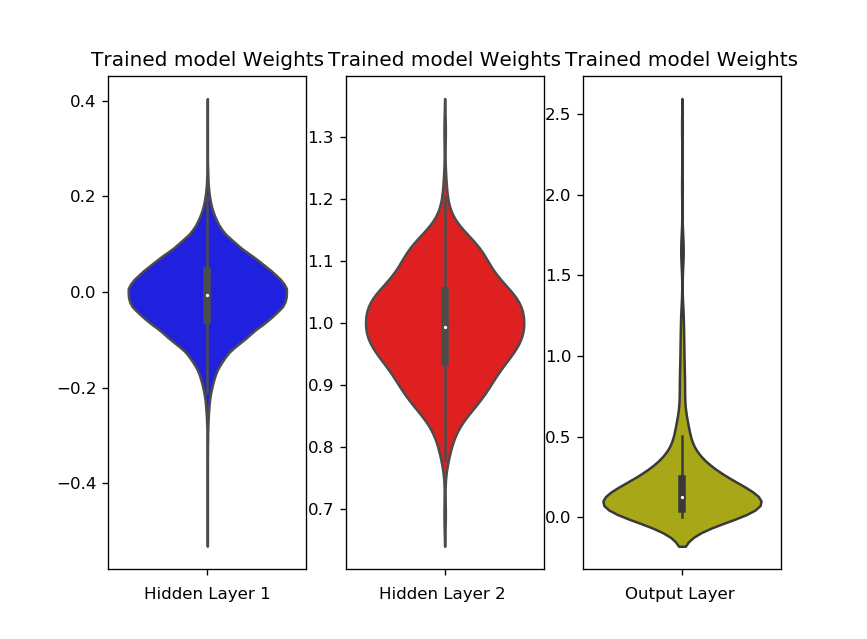

In [26]:
#run
model_1D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1D = model_1D.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_1D.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_1D.history['val_loss']
ty = history_1D.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_1D.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

---
---
## MODEL2-  with 3-Hidden layers

### 3 hidden layer simple

In [27]:
#model declaration and initialization
model_2A= Sequential()

model_2A.add(Dense(550, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_2A.add(Dense(300, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_2A.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))

model_2A.add(Dense(10, activation='softmax'))

print(model_2A.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               165300    
_________________________________________________________________
dense_15 (Dense)             (None, 80)                24080     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                810       
Total params: 621,940
Trainable params: 621,940
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2461 - acc: 0.9276 - val_loss: 0.1079 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0844 - acc: 0.9741 - val_loss: 0.0810 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0535 - acc: 0.9831 - val_loss: 0.0723 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0678 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0686 - val_acc: 0.9791
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0707 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0801 -

<IPython.core.display.Javascript object>


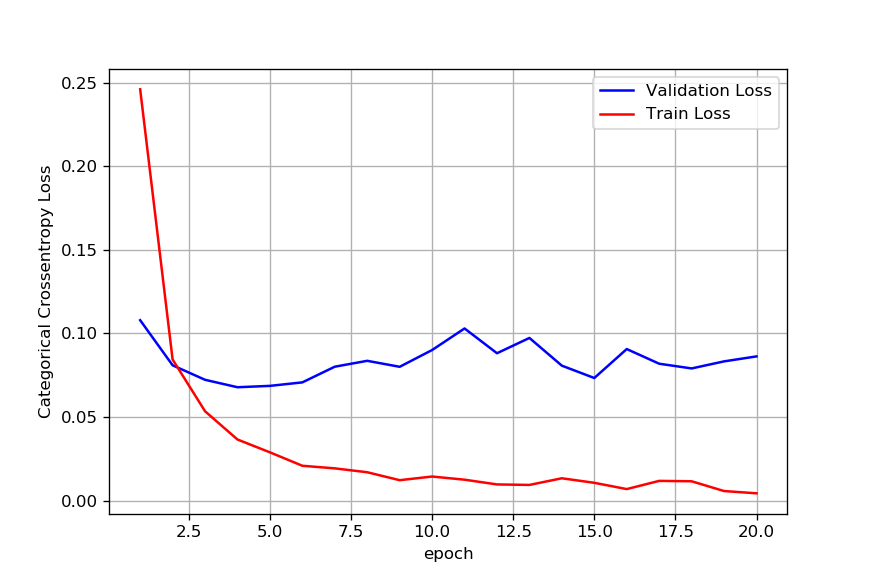

------------------------------------------------------------


<IPython.core.display.Javascript object>


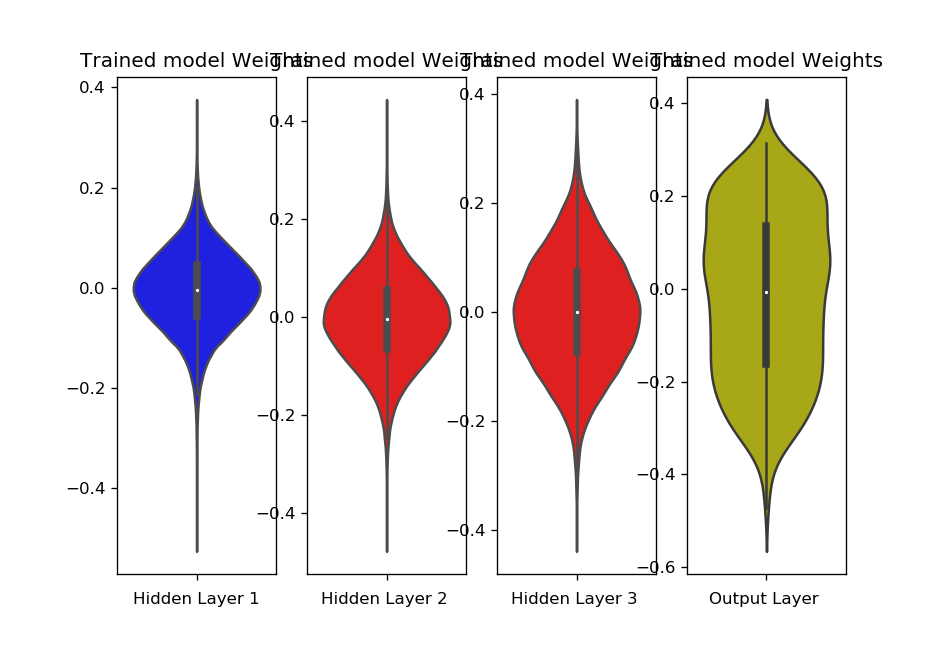

In [28]:
#run
model_2A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2A = model_2A.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_2A.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_2A.history['val_loss']
ty = history_2A.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_2A.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 hidden layer with batch normalization

In [29]:
#model declaration and initialization
model_2B= Sequential()

model_2B.add(Dense(550, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2B.add(BatchNormalization())

model_2B.add(Dense(300, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2B.add(BatchNormalization())

model_2B.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_2B.add(BatchNormalization())

model_2B.add(Dense(10, activation='softmax'))

print(model_2B.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_5 (Batch (None, 550)               2200      
_________________________________________________________________
dense_18 (Dense)             (None, 300)               165300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dense_19 (Dense)             (None, 80)                24080     
_________________________________________________________________
batch_normalization_7 (Batch (None, 80)                320       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                810       
Total para

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.1949 - acc: 0.9416 - val_loss: 0.1041 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0653 - acc: 0.9807 - val_loss: 0.0846 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0756 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0834 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0250 - acc: 0.9920 - val_loss: 0.0733 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0709 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0154 - acc: 0.9951 - val_loss: 0.

<IPython.core.display.Javascript object>


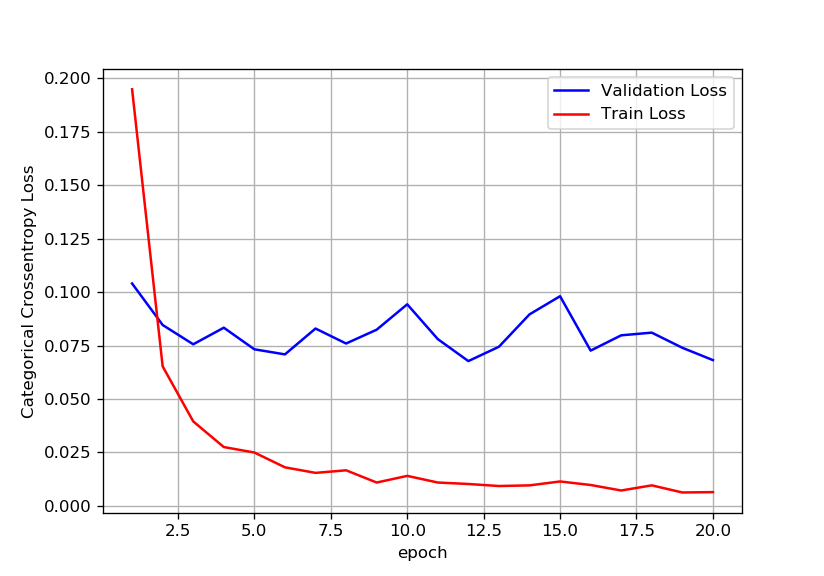

------------------------------------------------------------


<IPython.core.display.Javascript object>


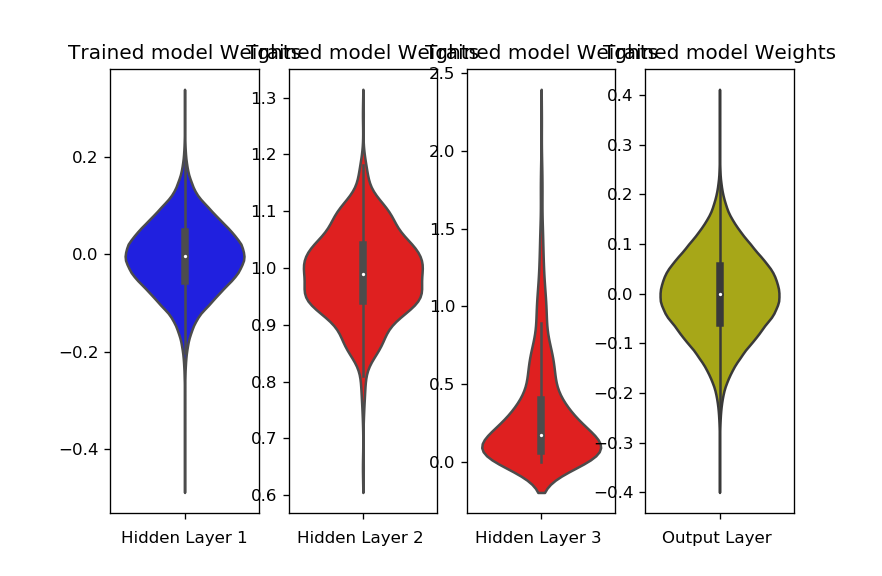

In [30]:
#run
model_2B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2B = model_2B.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_2B.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_2B.history['val_loss']
ty = history_2B.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_2B.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 hidden layer with dropouts

In [31]:
#model declaration and initialization
model_2C= Sequential()

model_2C.add(Dense(550, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2C.add(Dropout(0.25))

model_2C.add(Dense(300, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2C.add(Dropout(0.25))

model_2C.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_2C.add(Dropout(0.25))

model_2C.add(Dense(10, activation='softmax'))

print(model_2A.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               165300    
_________________________________________________________________
dense_15 (Dense)             (None, 80)                24080     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                810       
Total params: 621,940
Trainable params: 621,940
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3805 - acc: 0.8839 - val_loss: 0.1279 - val_acc: 0.9601
Epoch 2/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.1511 - acc: 0.9550 - val_loss: 0.0886 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1060 - acc: 0.9681 - val_loss: 0.0757 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0837 - acc: 0.9751 - val_loss: 0.0714 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0696 - acc: 0.9795 - val_loss: 0.0614 - val_acc: 0.9822
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0578 - acc: 0.9821 - val_loss: 0.0603 - val_acc: 0.9833
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.

<IPython.core.display.Javascript object>


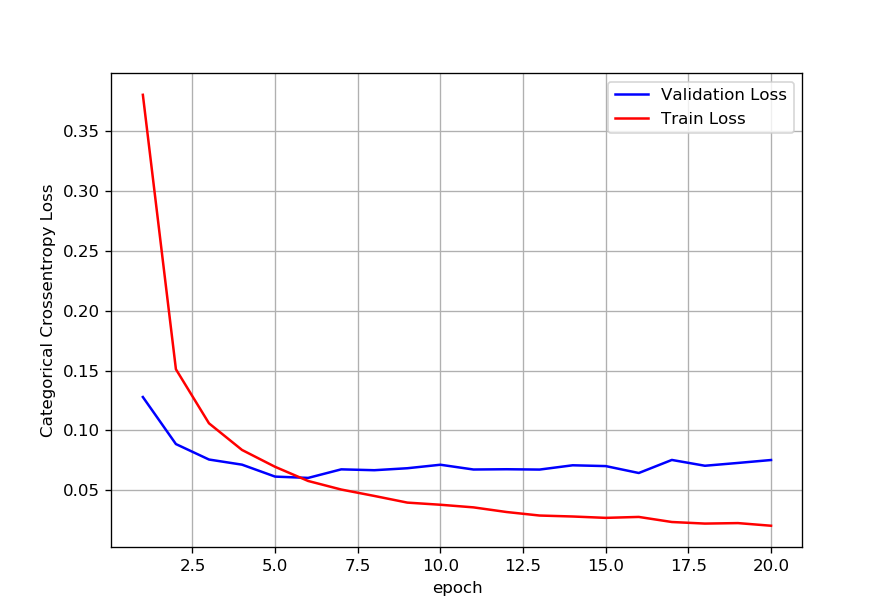

------------------------------------------------------------


<IPython.core.display.Javascript object>


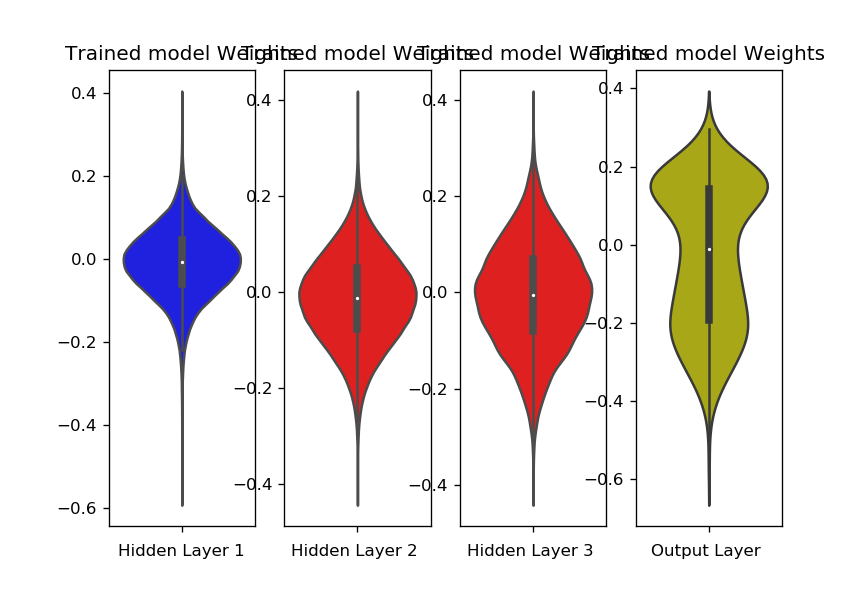

In [32]:
#run
model_2C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2C = model_2C.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_2C.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_2C.history['val_loss']
ty = history_2C.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_2C.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 hidden layer with dropouts and batch normalization

In [33]:
#model declaration and initialization
model_2D= Sequential()

model_2D.add(Dense(550, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2D.add(BatchNormalization())
model_2D.add(Dropout(0.25))

model_2D.add(Dense(300, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2D.add(BatchNormalization())
model_2D.add(Dropout(0.25))

model_2D.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_2D.add(BatchNormalization())
model_2D.add(Dropout(0.25))

model_2D.add(Dense(10, activation='softmax'))

print(model_2D.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_8 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_8 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               165300    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 80)                24080     
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.3217 - acc: 0.9036 - val_loss: 0.1146 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1392 - acc: 0.9585 - val_loss: 0.0913 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0991 - acc: 0.9693 - val_loss: 0.0724 - val_acc: 0.9767
Epoch 4/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0798 - acc: 0.9749 - val_loss: 0.0860 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0679 - acc: 0.9787 - val_loss: 0.0712 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0589 - acc: 0.9811 - val_loss: 0.0701 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0509 - acc: 0.9834 - val_loss: 0.

<IPython.core.display.Javascript object>


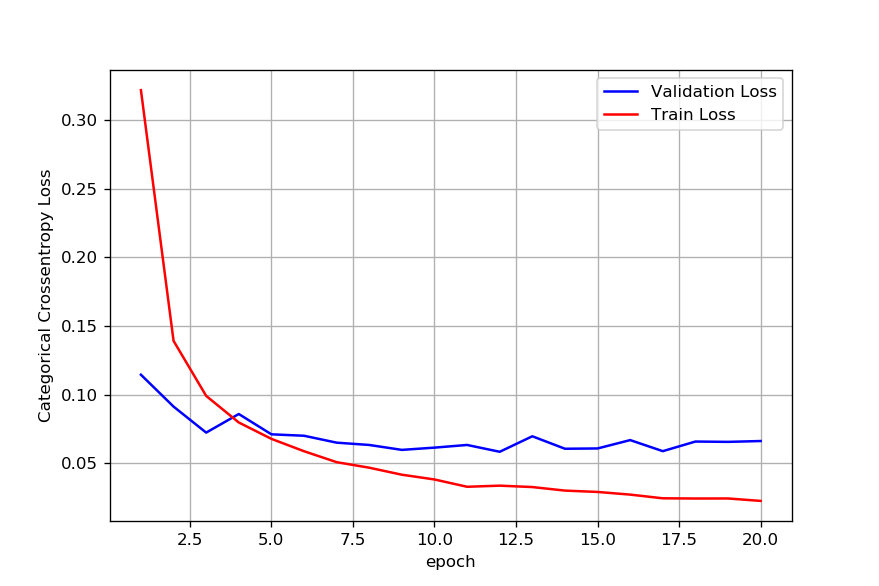

------------------------------------------------------------


<IPython.core.display.Javascript object>


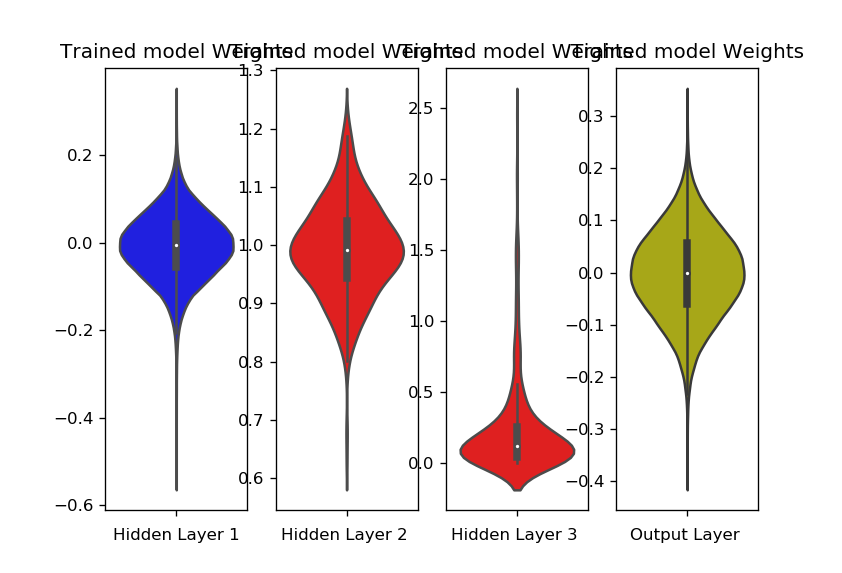

In [34]:
#run
model_2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2D = model_2D.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_2D.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_2D.history['val_loss']
ty = history_2D.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_2D.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

---
---
## MODEL3-  with 5-Hidden layers

### 5 hidden layer simple

In [44]:
#model declaration and initialization
model_3A= Sequential()

model_3A.add(Dense(630, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_3A.add(Dense(480, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))

model_3A.add(Dense(330, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_3A.add(Dense(180, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))

model_3A.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))

model_3A.add(Dense(10, activation='softmax'))

print(model_3A.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 630)               494550    
_________________________________________________________________
dense_54 (Dense)             (None, 480)               302880    
_________________________________________________________________
dense_55 (Dense)             (None, 330)               158730    
_________________________________________________________________
dense_56 (Dense)             (None, 180)               59580     
_________________________________________________________________
dense_57 (Dense)             (None, 80)                14480     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                810       
Total params: 1,031,030
Trainable params: 1,031,030
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.2300 - acc: 0.9310 - val_loss: 0.1241 - val_acc: 0.9609
Epoch 2/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0840 - acc: 0.9739 - val_loss: 0.0852 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0573 - acc: 0.9820 - val_loss: 0.0727 - val_acc: 0.9769
Epoch 4/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0389 - acc: 0.9876 - val_loss: 0.0814 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0327 - acc: 0.9891 - val_loss: 0.0853 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0682 - val_acc: 0.9821
Epoch 7/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0235 - acc: 0.9926 - val_loss: 0.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


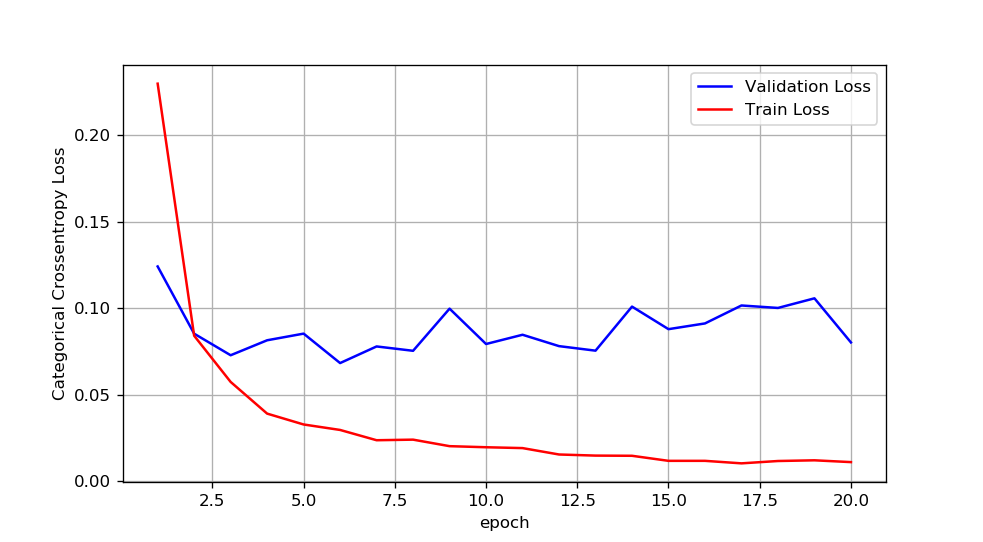

------------------------------------------------------------


<IPython.core.display.Javascript object>


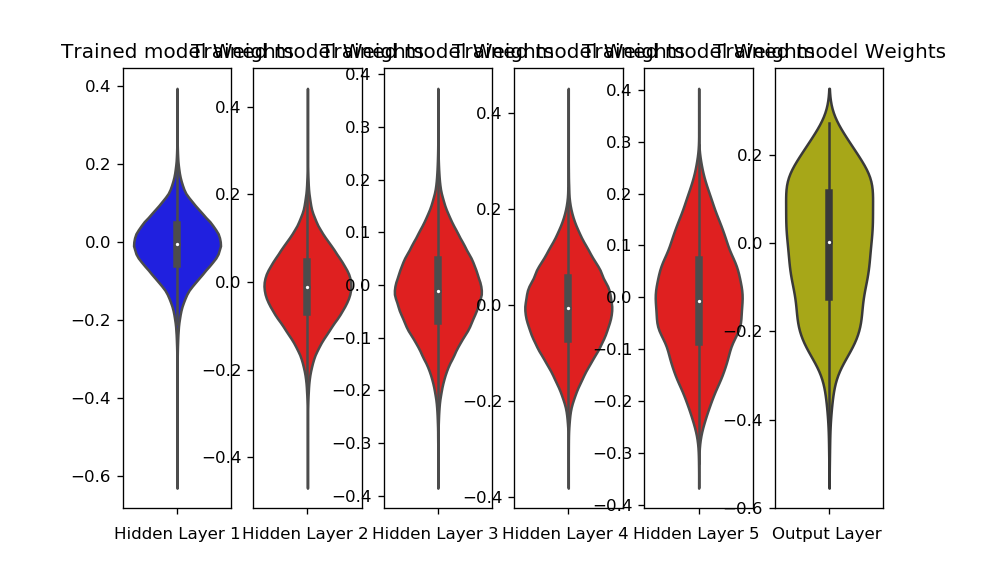

In [45]:
#run
model_3A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3A = model_3A.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_3A.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_3A.history['val_loss']
ty = history_3A.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_3A.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 hidden layer with batch normalization

In [46]:
#model declaration and initialization
model_3B= Sequential()

model_3B.add(Dense(630, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3B.add(BatchNormalization())

model_3B.add(Dense(480, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3B.add(BatchNormalization())

model_3B.add(Dense(330, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_3B.add(BatchNormalization())

model_3B.add(Dense(180, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3B.add(BatchNormalization())

model_3B.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_3B.add(BatchNormalization())

model_3B.add(Dense(10, activation='softmax'))

print(model_3B.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 630)               494550    
_________________________________________________________________
batch_normalization_21 (Batc (None, 630)               2520      
_________________________________________________________________
dense_60 (Dense)             (None, 480)               302880    
_________________________________________________________________
batch_normalization_22 (Batc (None, 480)               1920      
_________________________________________________________________
dense_61 (Dense)             (None, 330)               158730    
_________________________________________________________________
batch_normalization_23 (Batc (None, 330)               1320      
_________________________________________________________________
dense_62 (Dense)             (None, 180)               59580     
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.1981 - acc: 0.9403 - val_loss: 0.1077 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.0715 - acc: 0.9775 - val_loss: 0.1002 - val_acc: 0.9698
Epoch 3/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0482 - acc: 0.9843 - val_loss: 0.0863 - val_acc: 0.974977 - acc: 0.
Epoch 4/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0365 - acc: 0.9878 - val_loss: 0.0823 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0321 - acc: 0.9897 - val_loss: 0.0846 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.0961 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0247 - acc: 0.9915 - 

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


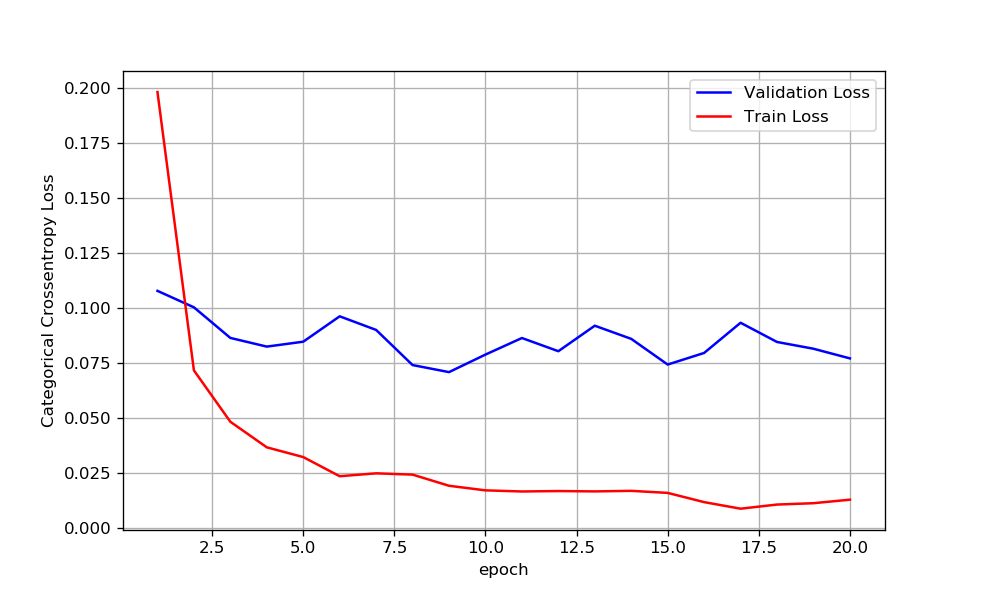

------------------------------------------------------------


<IPython.core.display.Javascript object>


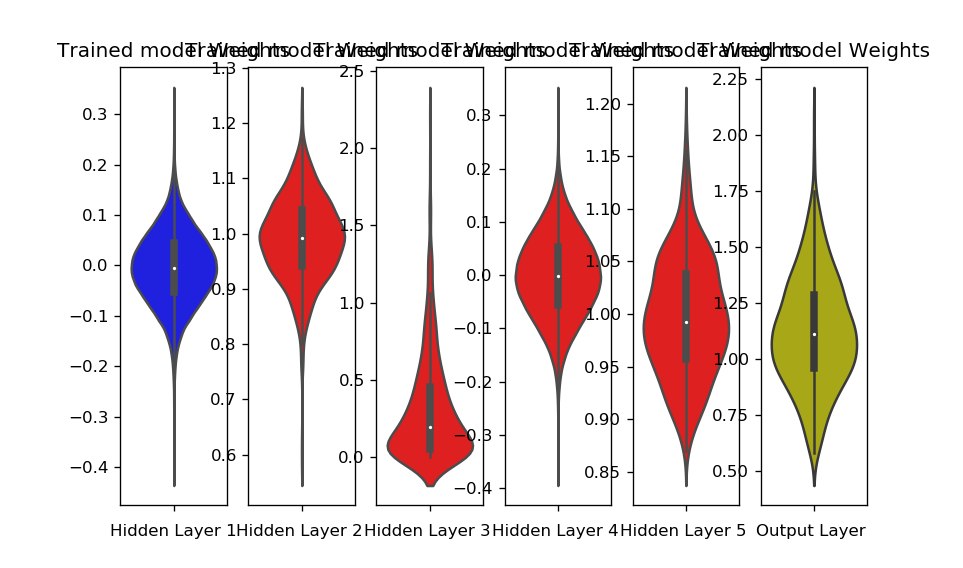

In [47]:
#run
model_3B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3B = model_3B.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_3B.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_3B.history['val_loss']
ty = history_3B.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_3B.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 hidden layer with dropouts

In [48]:
#model declaration and initialization
model_3C= Sequential()

model_3C.add(Dense(630, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3C.add(Dropout(0.25))

model_3C.add(Dense(480, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3C.add(Dropout(0.25))

model_3C.add(Dense(330, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3C.add(Dropout(0.25))

model_3C.add(Dense(180, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3C.add(Dropout(0.25))

model_3C.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_3C.add(Dropout(0.25))

model_3C.add(Dense(10, activation='softmax'))

print(model_3C.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 630)               494550    
_________________________________________________________________
dropout_21 (Dropout)         (None, 630)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 480)               302880    
_________________________________________________________________
dropout_22 (Dropout)         (None, 480)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 330)               158730    
_________________________________________________________________
dropout_23 (Dropout)         (None, 330)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 180)               59580     
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.4887 - acc: 0.8458 - val_loss: 0.1705 - val_acc: 0.9495
Epoch 2/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.1712 - acc: 0.9533 - val_loss: 0.1034 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1272 - acc: 0.9654 - val_loss: 0.0883 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1025 - acc: 0.9719 - val_loss: 0.0906 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0903 - acc: 0.9757 - val_loss: 0.0802 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.0761 - acc: 0.9793 - val_loss: 0.0848 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.0679 - acc: 0.9806 - val_loss: 0.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


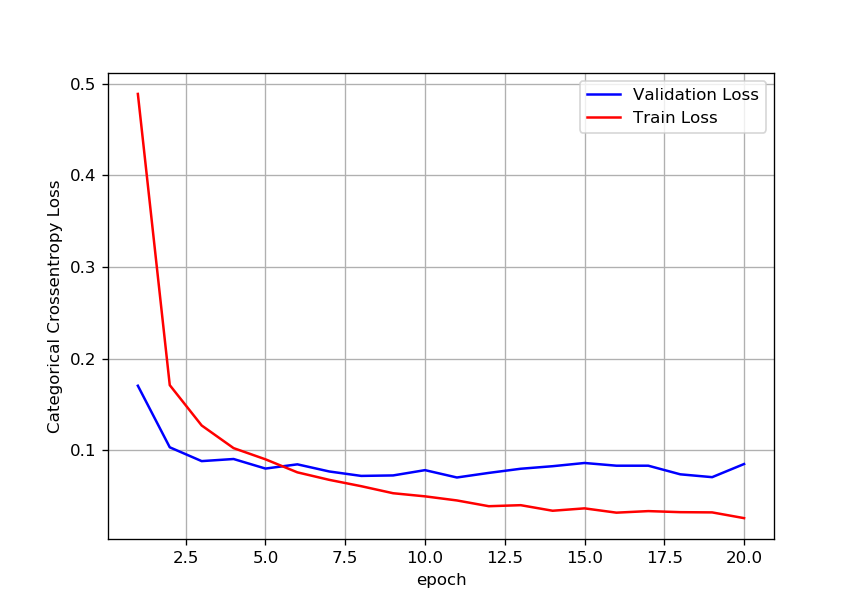

------------------------------------------------------------


<IPython.core.display.Javascript object>


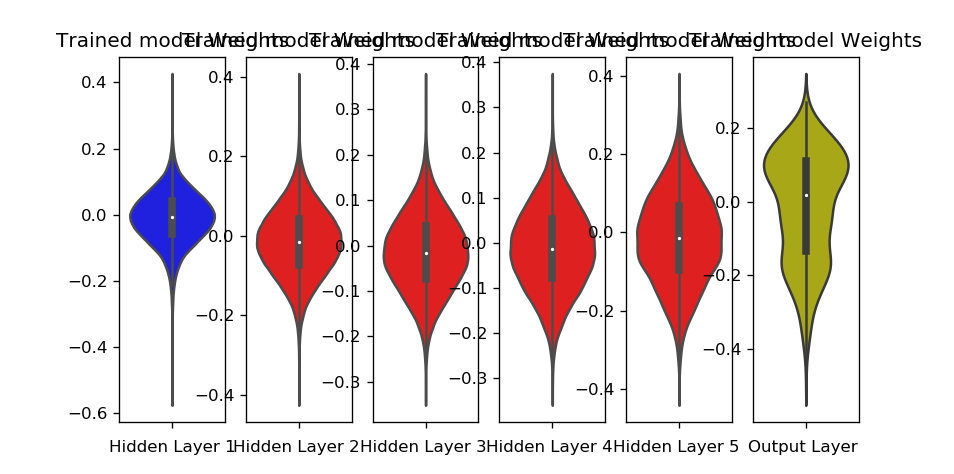

In [49]:
#run
model_3C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3C = model_3C.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_3C.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_3C.history['val_loss']
ty = history_3C.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_3C.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 hidden layer with dropouts and batch normalization

In [50]:
#model declaration and initialization
model_3D= Sequential()

model_3D.add(Dense(630, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3D.add(BatchNormalization())
model_3D.add(Dropout(0.25))

model_3D.add(Dense(480, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3D.add(BatchNormalization())
model_3D.add(Dropout(0.25))

model_3D.add(Dense(330, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3D.add(BatchNormalization())
model_3D.add(Dropout(0.25))

model_3D.add(Dense(180, activation='relu', \
        input_shape= (784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3D.add(BatchNormalization())
model_3D.add(Dropout(0.25))

model_3D.add(Dense(80, activation='relu', \
        kernel_initializer= keras.initializers.he_normal(seed=None)))
model_3D.add(BatchNormalization())
model_3D.add(Dropout(0.25))

model_3D.add(Dense(10, activation='softmax'))

print(model_3D.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 630)               494550    
_________________________________________________________________
batch_normalization_26 (Batc (None, 630)               2520      
_________________________________________________________________
dropout_26 (Dropout)         (None, 630)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 480)               302880    
_________________________________________________________________
batch_normalization_27 (Batc (None, 480)               1920      
_________________________________________________________________
dropout_27 (Dropout)         (None, 480)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 330)               158730    
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.4195 - acc: 0.8724 - val_loss: 0.1282 - val_acc: 0.9620
Epoch 2/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.1621 - acc: 0.9516 - val_loss: 0.0979 - val_acc: 0.9711
Epoch 3/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.1193 - acc: 0.9635 - val_loss: 0.0911 - val_acc: 0.9730
Epoch 4/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.0994 - acc: 0.9699 - val_loss: 0.0767 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0828 - acc: 0.9750 - val_loss: 0.0772 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.0719 - acc: 0.9782 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0653 - acc: 0.9803 - val_loss: 0.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


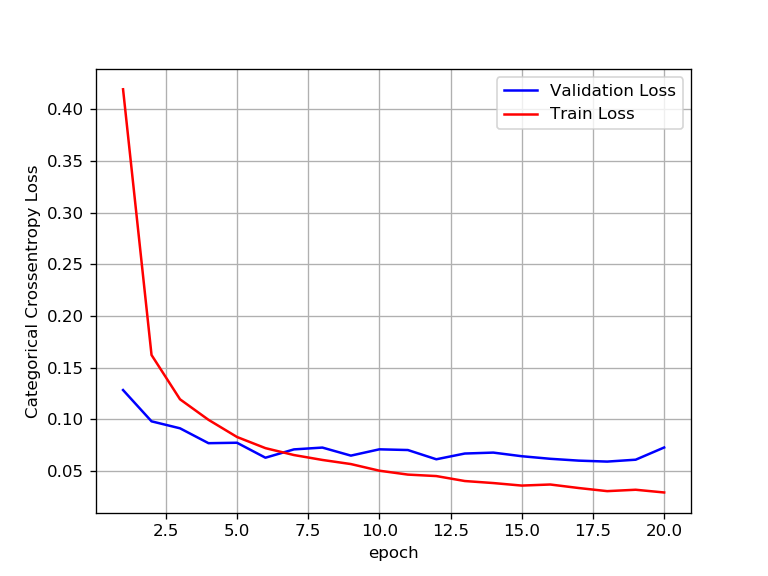

------------------------------------------------------------


<IPython.core.display.Javascript object>


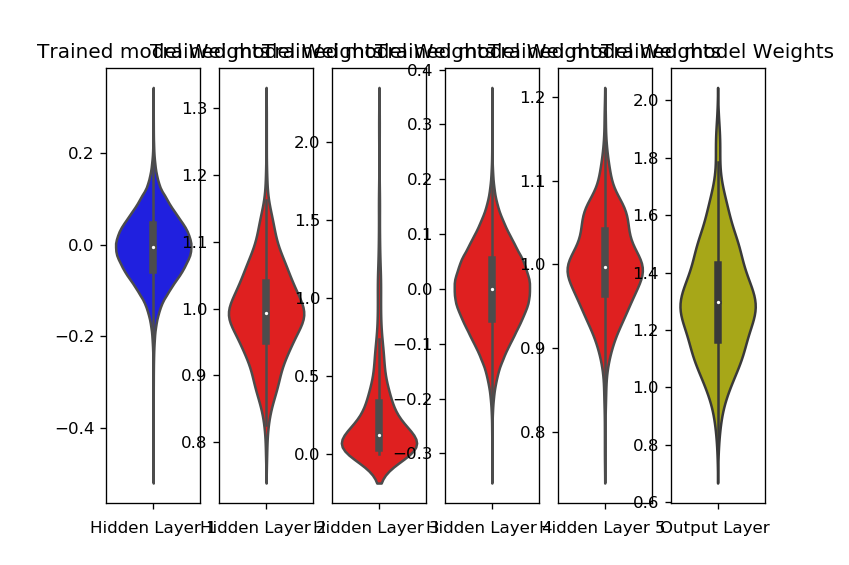

In [51]:
#run
model_3D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3D = model_3D.fit(x_train,y_train,batch_size=200,epochs=20,verbose=1,validation_data=(x_test,y_test)) 
print('------------------------------------------------------------')

score= model_3D.evaluate(x_test, y_test, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
print('------------------------------------------------------------')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,21))
vy = history_3D.history['val_loss']
ty = history_3D.history['loss']
plt_dynamic(x, vy, ty, ax)
print('------------------------------------------------------------')

w_after = model_3D.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Summary

Model | Hidden Layers | simple | with batchNorm | with Dropout | with batchNorm and Dropout
---|---|---|---|---|---
1|2|0.9784|0.9806|0.9838|0.9822
2|3|0.9818|0.9824|0.9836|0.9838
3|5|0.9835|0.9802|0.9829|0.9829



* Model with 3 hidden layered structure performed well in our case taking batchnormalization and dropout 
  with accuracy of 98.38
* Dropout and BatchNormalization had good impact on accuracy and time to train the model
* So performance was incresed by adding batchNormalization and Dropout layer